In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.txt',names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
def normalize_feature(data):
    return (data-data.mean())/data.std()
data = normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


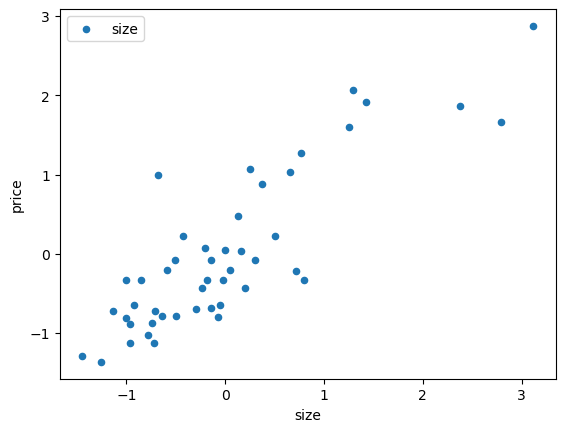

In [4]:
data.plot.scatter('size','price',label='size')
plt.show()

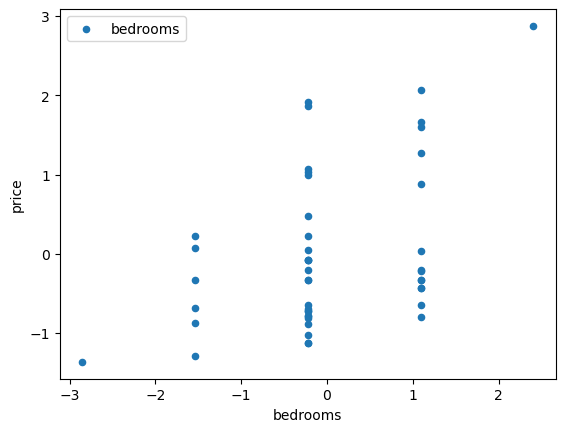

In [5]:
data.plot.scatter('bedrooms','price',label='bedrooms')
plt.show()

In [6]:
data.insert(0,'ones',1)

In [7]:
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [8]:
X = data.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [9]:
y = data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [10]:
X = X.values
X.shape

(47, 3)

In [11]:
y = y.values
y.shape

(47,)

In [12]:
y = y.reshape(47,1)

In [13]:
y.shape

(47, 1)

In [14]:
def costFunction(X,y,theta):
    inner = np.power( X@theta - y, 2 )
    return np.sum(inner) / (2*len(X))
theta = np.zeros((3,1))

In [15]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


In [16]:
# 梯度下降
def gradientDescent(X,y,theta,alpha,iters,isprint=False):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            if isprint:
                print(cost)
            
    return theta,costs

In [17]:
alpha_all = [0.0003,0.003,0.03,0.0001,0.001,0.01]
iters = 2000

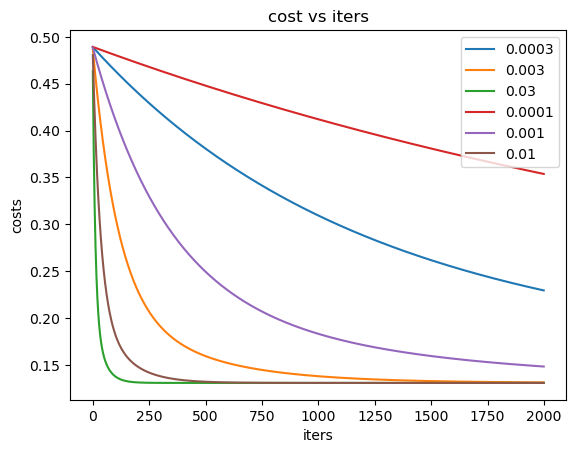

In [18]:
fig,ax = plt.subplots()



for alpha in alpha_all:
    _,costs = gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label=alpha)
    
    ax.legend()
    
ax.set(xlabel='iters',
      ylabel='costs',
      title='cost vs iters')
plt.show()

In [19]:
theta

array([[0.],
       [0.],
       [0.]])